In [1]:
# Install libraries (if not installed)
!pip install seaborn scikit-learn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




In [2]:
# Create synthetic dataset
np.random.seed(42)

data = {
    'sleep_hours': np.random.randint(3, 10, 200),
    'screen_time': np.random.randint(2, 12, 200),
    'study_hours': np.random.randint(1, 10, 200),
    'exercise_hours': np.random.randint(0, 3, 200),
    'coffee_intake': np.random.randint(0, 5, 200),
}

df = pd.DataFrame(data)

# Stress level based on lifestyle
df['stress_level'] = (
    (df['sleep_hours'] < 5).astype(int) +
    (df['screen_time'] > 8).astype(int) +
    (df['study_hours'] > 7).astype(int) +
    (df['exercise_hours'] < 1).astype(int) +
    (df['coffee_intake'] > 3).astype(int)
)

# Convert stress score into categories
df['stress_label'] = pd.cut(df['stress_level'], bins=[-1,1,3,5], labels=['Low','Moderate','High'])

df.head()


,sleep_hours,screen_time,study_hours,exercise_hours,coffee_intake,stress_level,stress_label
0,9,10,2,0,0,2,Moderate
1,6,6,9,2,2,1,Low
2,7,7,8,0,3,2,Moderate
3,9,5,7,2,3,0,Low
4,5,11,9,0,0,3,Moderate


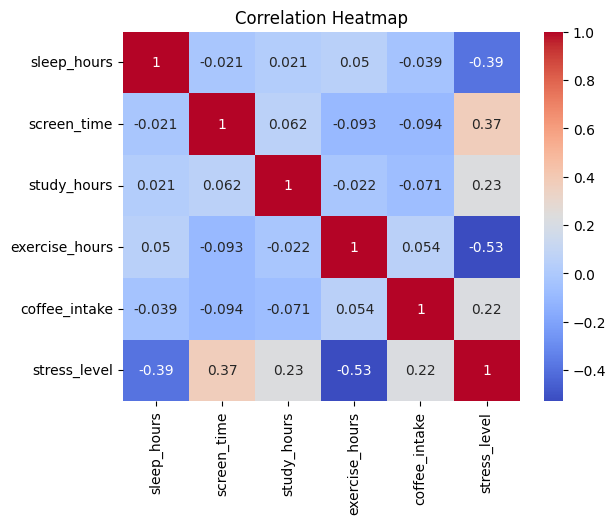

In [4]:
# Only numeric columns for correlation
numeric_df = df.drop(columns=['stress_label'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [5]:
# Features & target
X = df[['sleep_hours','screen_time','study_hours','exercise_hours','coffee_intake']]
y = df['stress_label']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy & report
from sklearn.metrics import classification_report, accuracy_score
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

         Low       0.91      1.00      0.95        30
    Moderate       1.00      0.70      0.82        10

    accuracy                           0.93        40
   macro avg       0.95      0.85      0.89        40
weighted avg       0.93      0.93      0.92        40



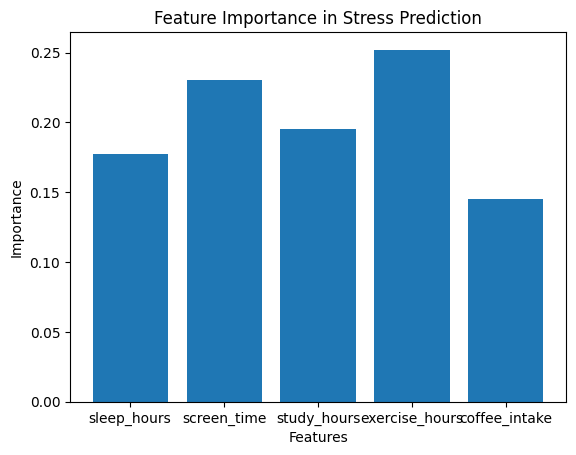

In [6]:
importance = model.feature_importances_
plt.bar(X.columns, importance)
plt.title("Feature Importance in Stress Prediction")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [7]:
def predict_stress(sleep, screen, study, exercise, coffee):
    features = np.array([[sleep, screen, study, exercise, coffee]])
    prediction = model.predict(features)[0]
    return f"Predicted Stress Level: {prediction}"

# Example Test
print(predict_stress(4, 9, 8, 0, 4))  # kam sleep, zyada screen time, coffee → High stress
print(predict_stress(8, 3, 4, 2, 1))  # accha balance → Low stress


Predicted Stress Level: Moderate
Predicted Stress Level: Low


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [9]:
sleep = int(input("Enter sleep hours: "))
screen = int(input("Enter screen time (hours): "))
study = int(input("Enter study hours: "))
exercise = int(input("Enter exercise hours: "))
coffee = int(input("Enter coffee intake (cups): "))

print(predict_stress(sleep, screen, study, exercise, coffee))


Enter sleep hours: 6
Enter screen time (hours): 3
Enter study hours: 4
Enter exercise hours: 2
Enter coffee intake (cups): 2
Predicted Stress Level: Low


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
